In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'Arial',
        'size'   : 8}
matplotlib.rc('font', **font)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.rm'] = 'Arial'

In [4]:
with open("result_lj.json", 'r') as f:
    results = json.load(f)

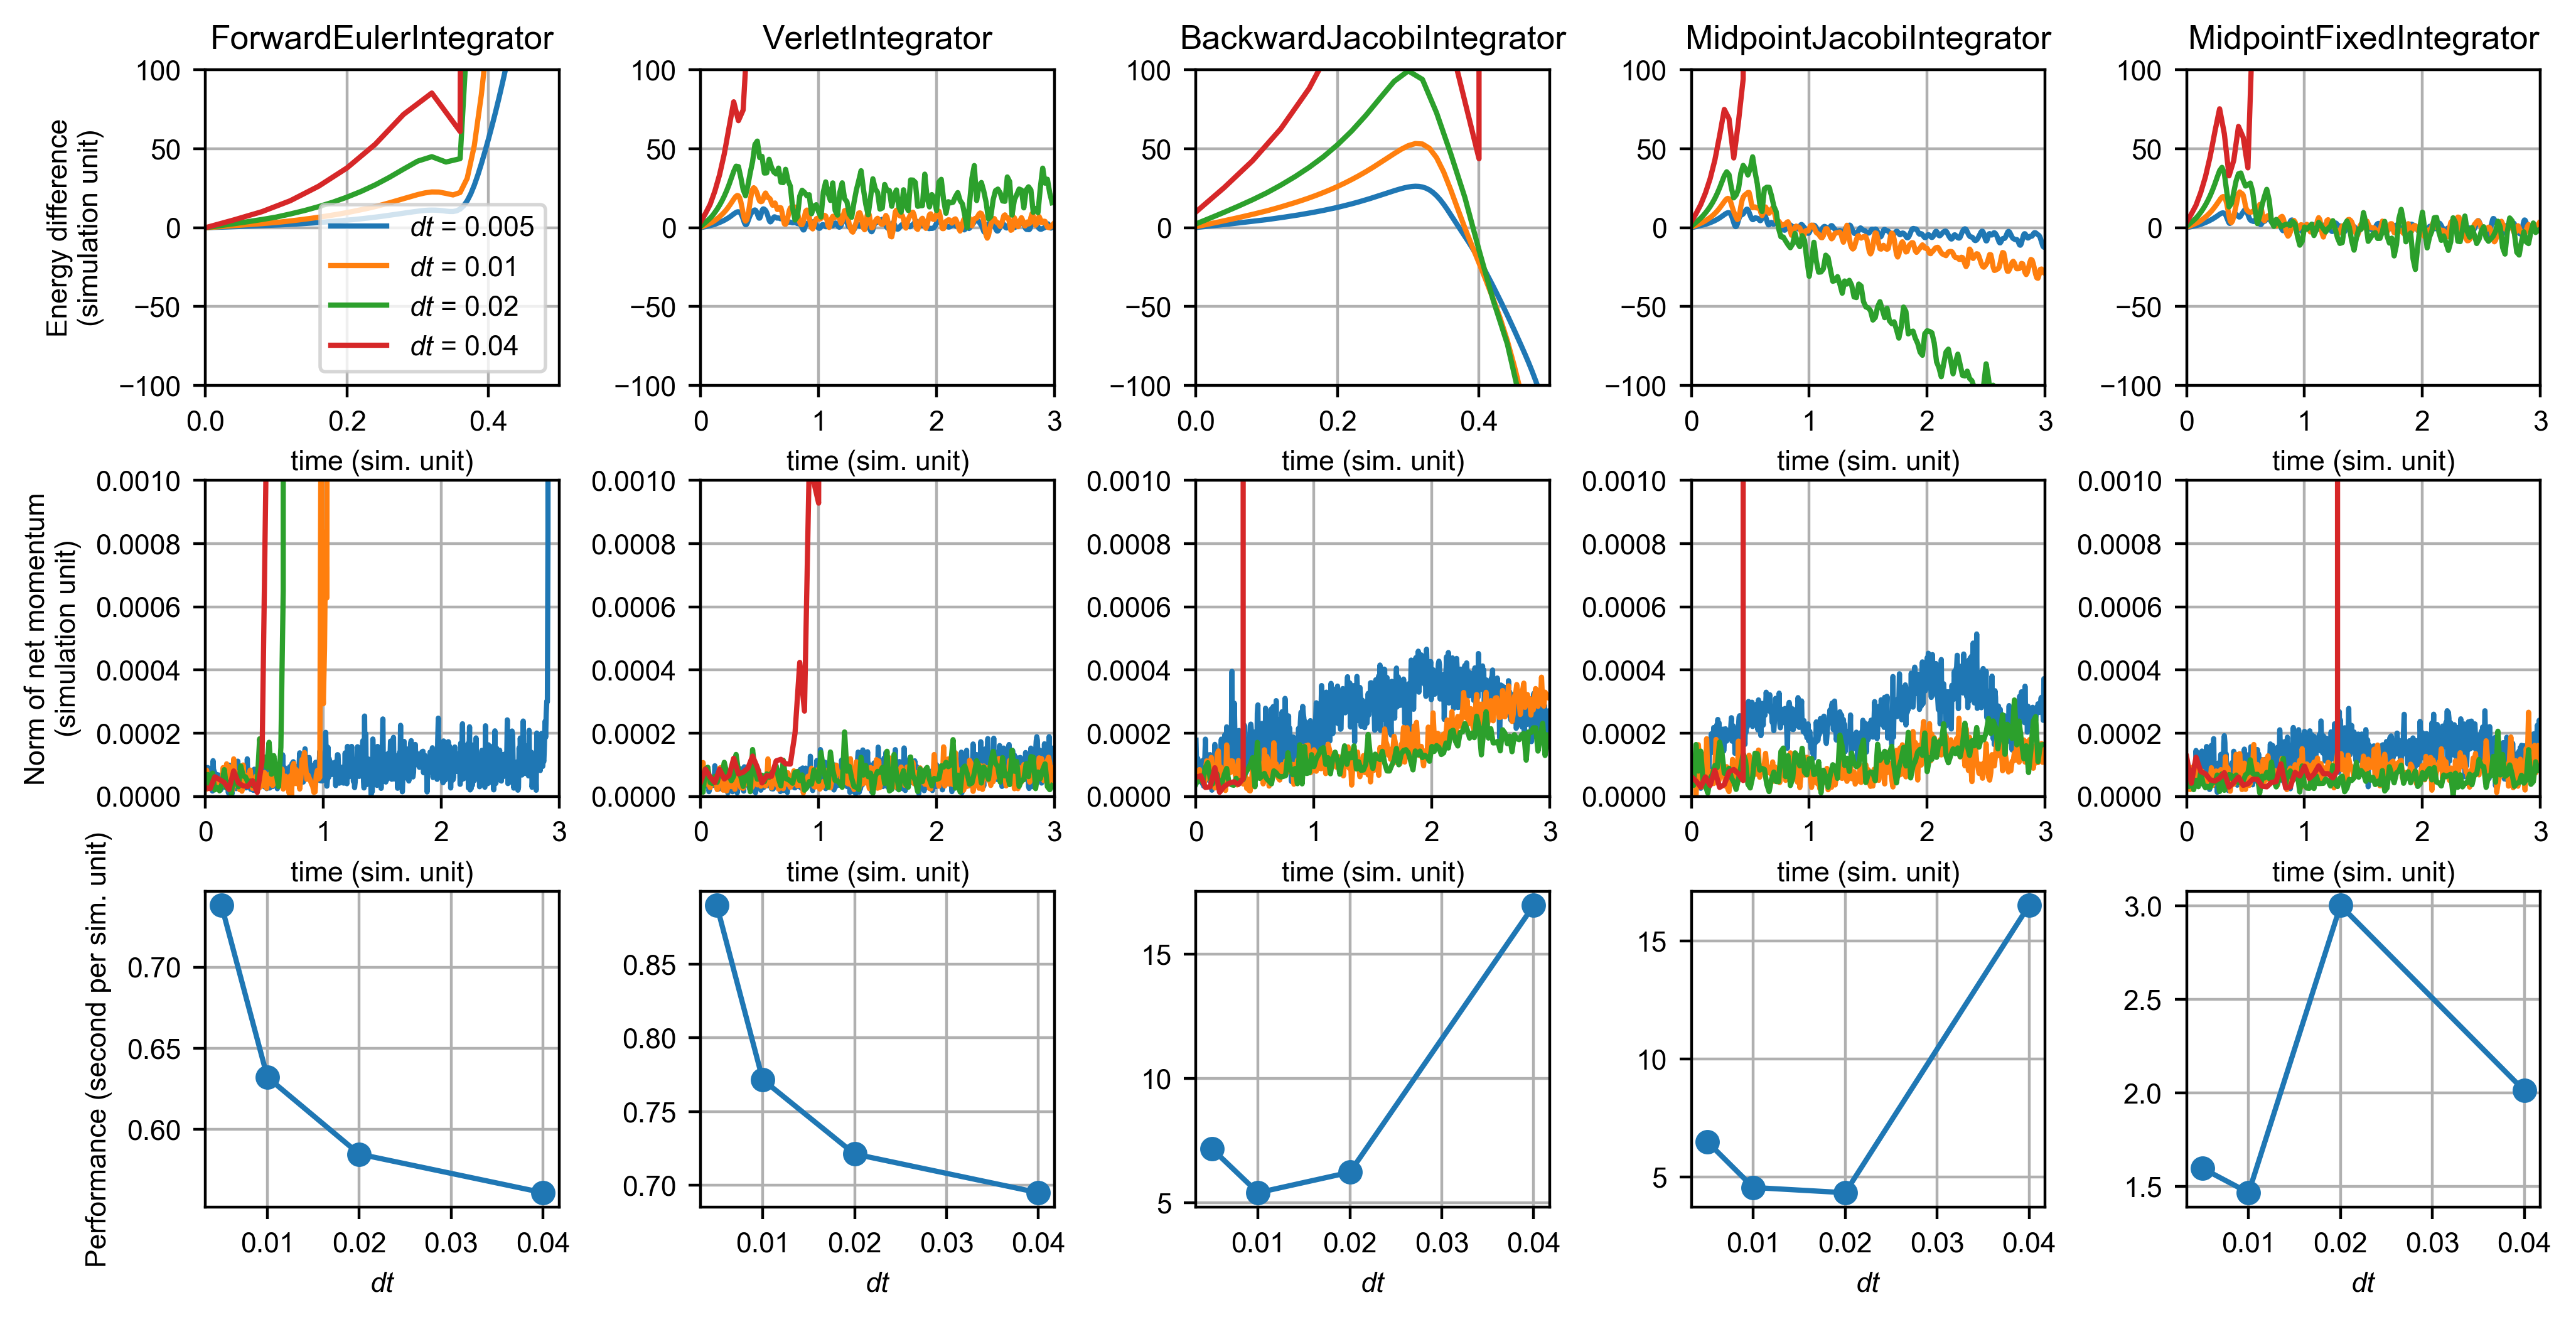

In [50]:
sys = 'lj'
e0 = results[sys]["VerletIntegrator"]["0.005"]['energy'][0]
fig, axes = plt.subplots(3, 5, dpi=400)
fig.set_size_inches(12, 6)
plt.subplots_adjust(wspace=0.4, hspace=0.3)
for i, k in enumerate(results[sys].keys()):
    for j, dt in enumerate(results[sys][k].keys()):
        data = results[sys][k][dt]
        nframe = len(data['energy'])
        de = np.array(data['energy']) - e0
        axes[0][i].plot(np.arange(nframe) * float(dt), de)
        axes[1][i].plot(np.arange(nframe) * float(dt), data['momentum'])
    axes[0][i].set_xlim([0, 3])
    axes[1][i].set_xlim([0, 3])
    axes[0][i].set_title(k)
    axes[0][i].set_ylim([-100, 100])
    axes[1][i].set_ylim([0, 1e-3])
    axes[0][i].grid('on')
    axes[1][i].grid('on')
    axes[2][i].grid('on')
    axes[0][i].set_xlabel("time (sim. unit)")
    axes[1][i].set_xlabel("time (sim. unit)")
    dt_all = [float(dt) for dt in results[sys][k].keys()]
    axes[2][i].plot(dt_all, 
                   [results[sys][k][dt]['perf'] for dt in results[sys][k].keys()],
                   marker='o')
    axes[2][i].set_xticks([0.01, 0.02, 0.03, 0.04])
    axes[2][i].set_xlabel("$dt$")
axes[2][0].set_ylabel("Performance (second per sim. unit)")
    
axes[0][0].set_ylabel("Energy difference\n(simulation unit)")
axes[1][0].set_ylabel("Norm of net momentum\n(simulation unit)")
axes[0][0].set_xlim([0, 0.5])
axes[0][2].set_xlim([0, 0.5])
axes[0][0].legend(["$dt$ = %s" % x for x in results[sys][k].keys()])
plt.show()

2207533.5


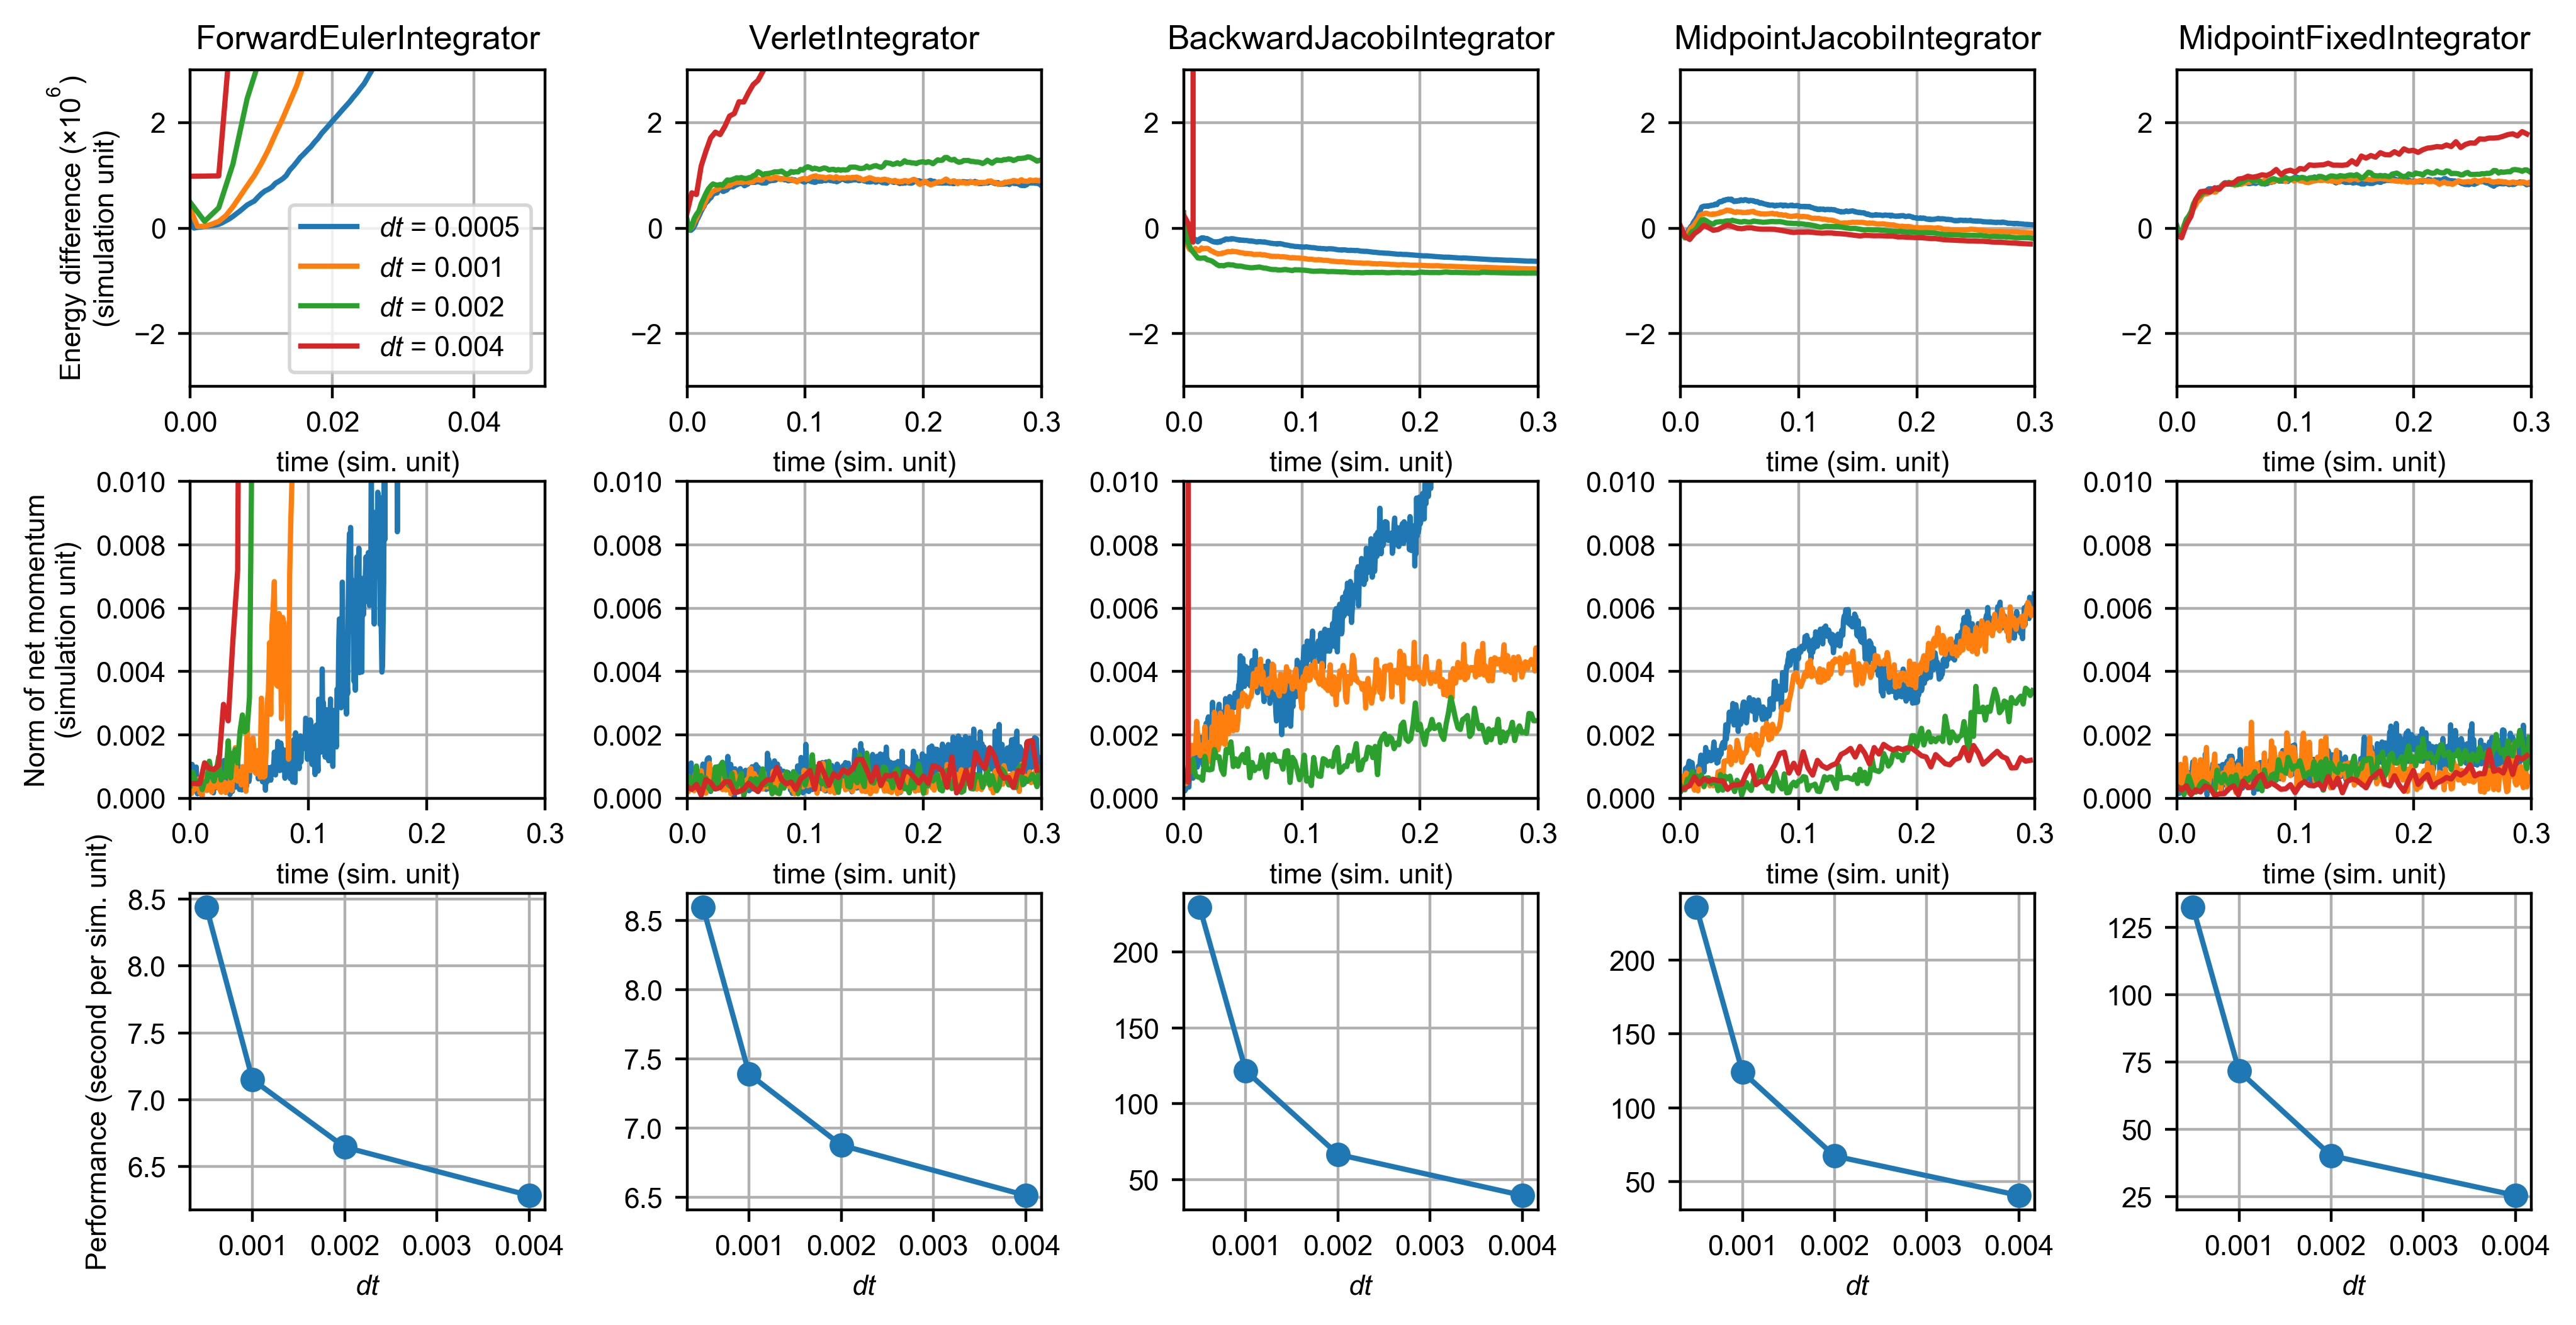

In [85]:
with open("result_chain.json", 'r') as f:
    results = json.load(f)
sys = 'chain'
e0 = results[sys]["VerletIntegrator"]["0.0005"]['energy'][0]
print(e0)
fig, axes = plt.subplots(3, 5, dpi=400)
fig.set_size_inches(12, 6)
plt.subplots_adjust(wspace=0.4, hspace=0.3)
for i, k in enumerate(results[sys].keys()):
    for j, dt in enumerate(results[sys][k].keys()):
        data = results[sys][k][dt]
        nframe = len(data['energy'])
        de = np.array(data['energy']) - e0
        axes[0][i].plot(np.arange(nframe) * float(dt), de / 1e6)
        axes[1][i].plot(np.arange(nframe) * float(dt), data['momentum'])
    axes[0][i].set_xlim([0, 0.3])
    axes[1][i].set_xlim([0, 0.3])
    axes[0][i].set_title(k)
    axes[0][i].set_ylim([-3, 3])
    axes[1][i].set_ylim([0, 0.01])
    axes[0][i].grid('on')
    axes[1][i].grid('on')
    axes[2][i].grid('on')
    axes[0][i].set_xlabel("time (sim. unit)")
    axes[1][i].set_xlabel("time (sim. unit)")
    dt_all = [float(dt) for dt in results[sys][k].keys()]
    axes[2][i].plot(dt_all, 
                   [results[sys][k][dt]['perf'] for dt in results[sys][k].keys()],
                   marker='o')
    axes[2][i].set_xticks([0.001, 0.002, 0.003, 0.004])
    axes[2][i].set_xlabel("$dt$")
axes[2][0].set_ylabel("Performance (second per sim. unit)")
    
axes[0][0].set_ylabel("Energy difference ($\\times 10^6$)\n(simulation unit)")
axes[1][0].set_ylabel("Norm of net momentum\n(simulation unit)")
axes[0][0].set_xlim([0, 0.05])
axes[0][2].set_xlim([0, 0.3])
axes[0][0].legend(["$dt$ = %s" % x for x in results[sys][k].keys()])
plt.show()